# Imports

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from opendata import OpenData
from lmfit import minimize, Parameters
from dateutil.parser import parse
import datetime

# Create OpenData object

In [90]:
od = OpenData()

# Taking all athletes

In [91]:
athletes = list(od.remote_athletes())

In [92]:
len(athletes)

6613

# Choosing random athlete

In [58]:
athlete = athletes[448]

In [59]:
athlete.metadata['ATHLETE']

{'gender': 'M', 'yob': '1979', 'id': '{11bf3ef3-c7b3-4d8d-be36-9021982b51f3}'}

In [61]:
athlete.id

'11bf3ef3-c7b3-4d8d-be36-9021982b51f3'

In [62]:
activities = list(athlete.activities())

In [96]:
activities

# Choosing random activity

In [63]:
n = 154

In [64]:
activities[n].metadata

{'date': '2018/11/05 15:26:21 UTC',
 'data': 'TDSPHC-AGL-----',
 'sport': 'Bike',
 'METRICS': {'a_skiba_xpower': ['198.90497', '3131.00000'],
  'a_skiba_relative_intensity': ['0.84640', '3131.00000'],
  'a_skiba_bike_score': '62.30690',
  'a_skiba_variability_index': '1.18095',
  'a_skiba_response_index': '1.47541',
  'a_coggan_np': ['206.86499', '3131.00000'],
  'a_coggan_if': ['0.88028', '3131.00000'],
  'a_coggan_tss': '67.39363',
  'a_coggam_variability_index': ['1.22821', '3131.00000'],
  'a_friel_efficiency_factor': '1.53446',
  'a_coggan_tssperhour': ['77.48868', '0.86972'],
  'aerobic_decoupling': '11.65664',
  'power_index': ['63.33773', '1.00000'],
  'ride_count': '1.00000',
  'workout_time': '3131.00000',
  'time_riding': '3124.00000',
  'total_distance': '28.80733',
  'climb_rating': ['0.17302', '1.00000'],
  'athlete_weight': '80.00000',
  'elevation_gain': '70.60000',
  'elevation_loss': '84.20000',
  'total_work': '527.35000',
  'average_speed': '33.19667',
  'average_po

## Plotting power curve of the activity

<AxesSubplot:xlabel='duration', ylabel='power'>

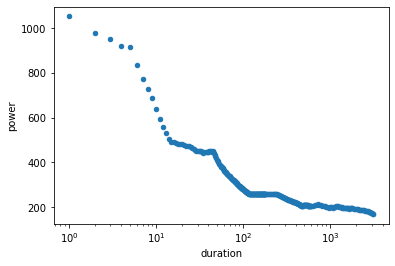

In [11]:
df = pd.DataFrame({'duration':activities[n].metadata['METRICS']['power_mmp_secs'], 'power':activities[n].metadata['METRICS']['power_mmp']})
df.plot('duration', 'power', kind='scatter', logx=True)

In [12]:
activities[n].data

,secs,km,power,hr,cad,alt
0,0,0.00000,59,80,71,9.6
1,1,0.00205,59,81,75,9.6
2,2,0.00462,59,82,77,9.6
3,3,0.00765,59,83,78,9.4
4,4,0.01111,59,83,78,9.4
...,...,...,...,...,...,...
3126,3126,28.80550,0,123,91,-3.2
3127,3127,28.80560,0,123,0,-3.2
3128,3128,28.80560,0,123,0,-3.2
3129,3129,28.80560,0,123,0,-3.2


## Plotting power duration of the activity

<AxesSubplot:>

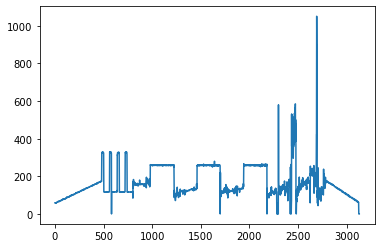

In [13]:
activities[n].data.power.plot()

## Plotting heart rate duration of the activity

<AxesSubplot:>

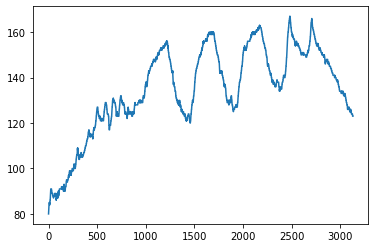

In [14]:
activities[n].data.hr.plot()

## Plotting altitude duration of the training

### Btw, we can see that the athlete ride the same loop twice

<AxesSubplot:>

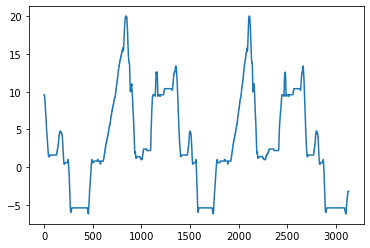

In [15]:
activities[n].data.alt.plot()

In [16]:
activities[n].metadata['METRICS']['a_skiba_xpower'][0]

'198.90497'

# Filter all activities with power data

In [17]:
bike_activities = list()
for activity in activities:
    if 'power_mmp_secs' in activity.metadata['METRICS']:
        bike_activities.append(activity)
len(bike_activities)

232

# Plotting power curve for every activity for chosen athlete

/Users/mateuszbulanda-gorol/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


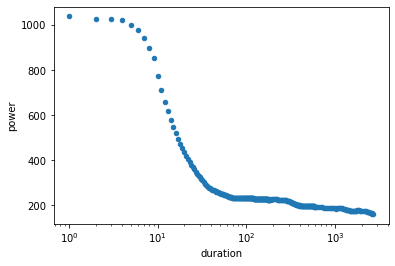

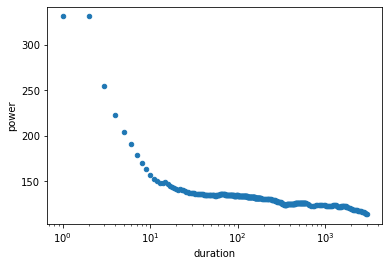

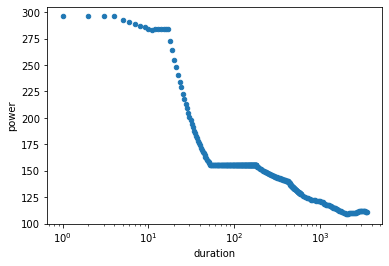

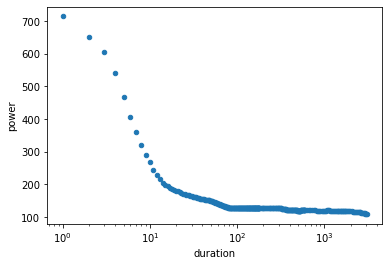

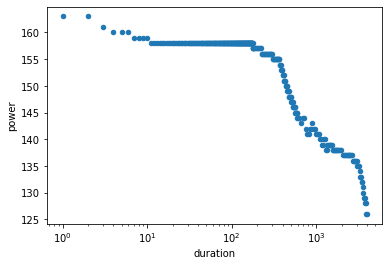

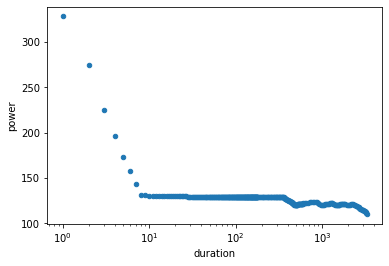

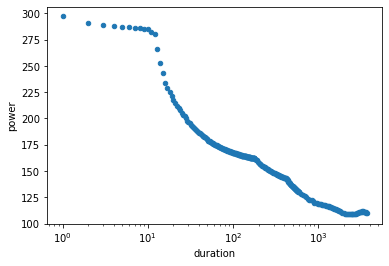

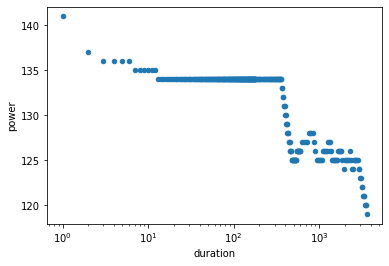

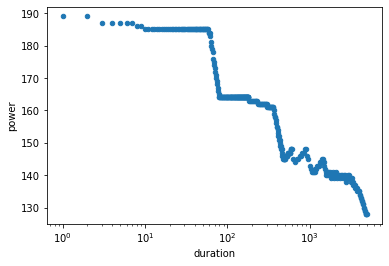

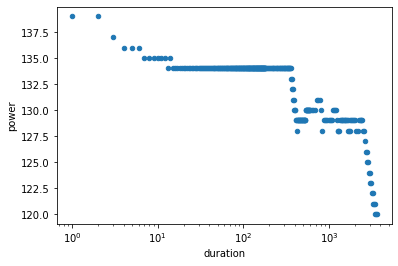

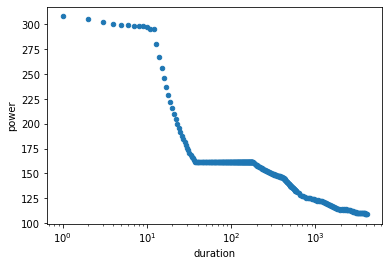

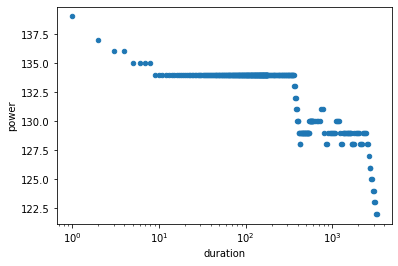

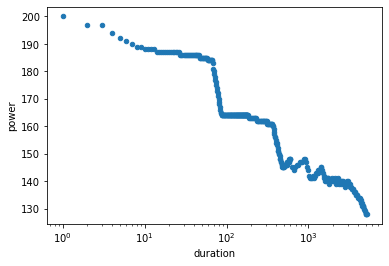

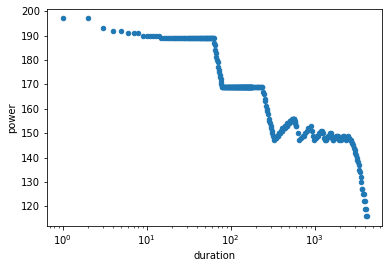

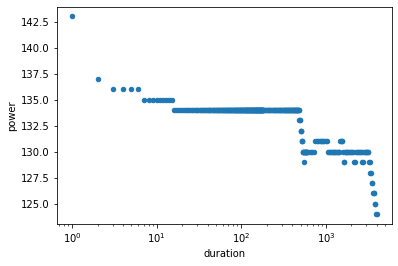

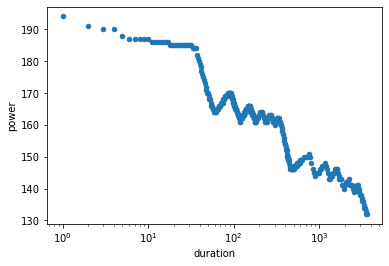

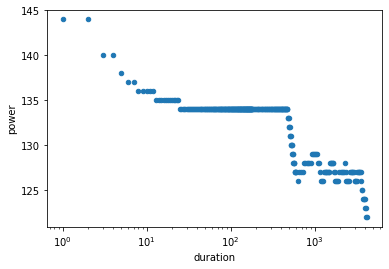

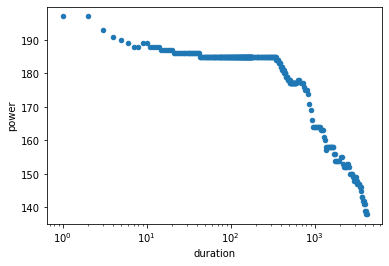

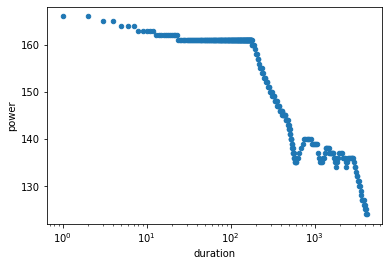

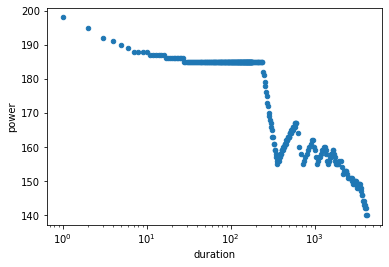

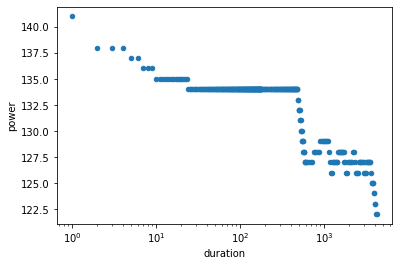

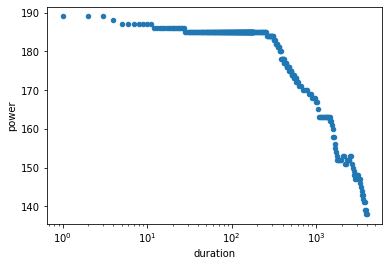

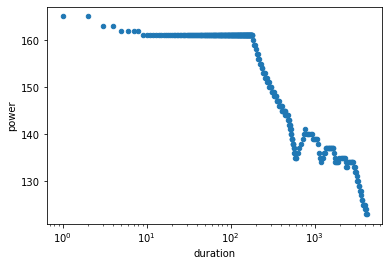

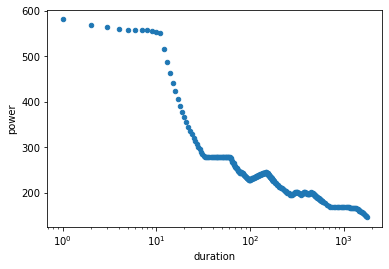

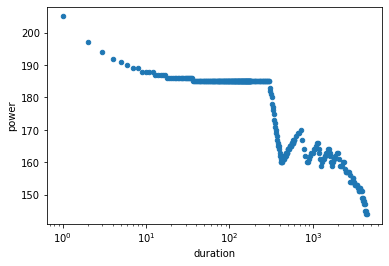

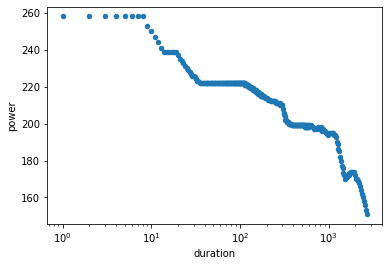

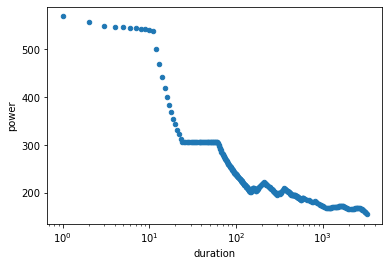

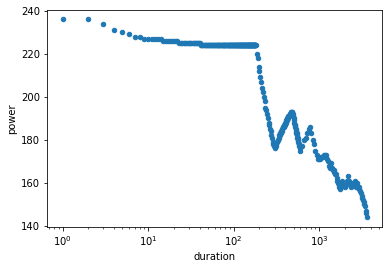

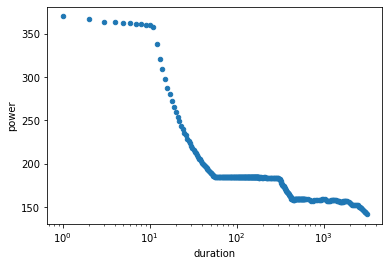

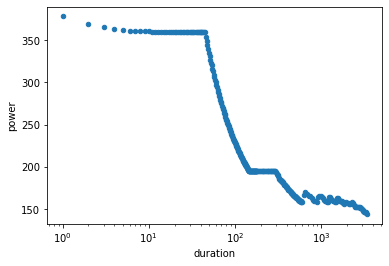

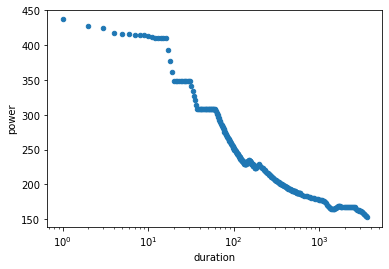

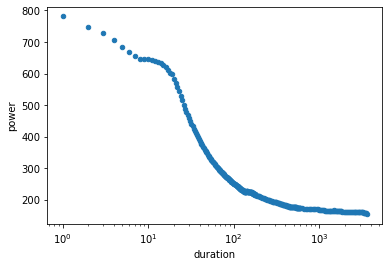

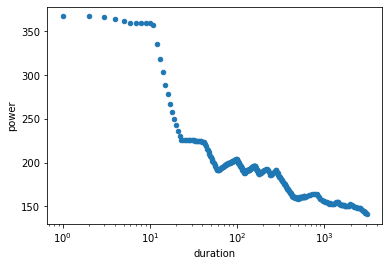

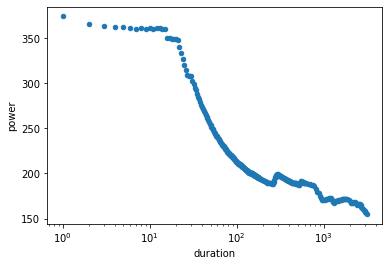

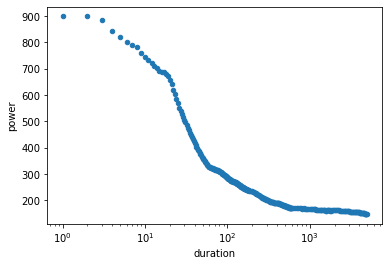

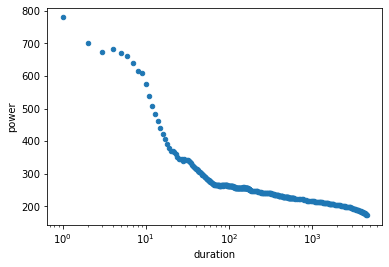

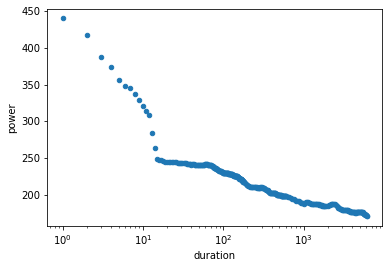

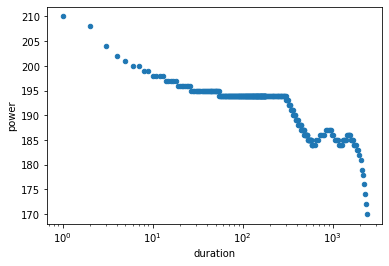

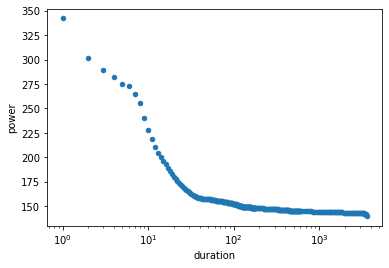

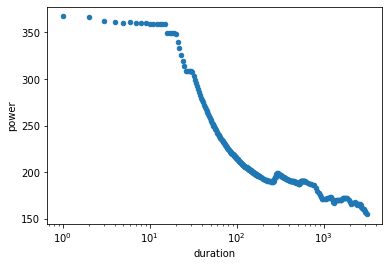

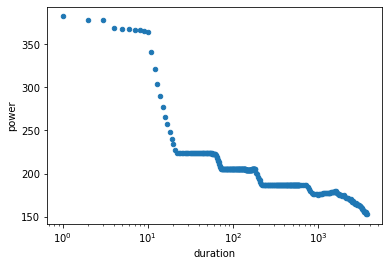

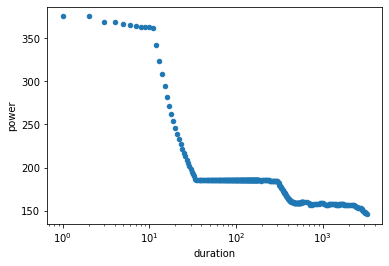

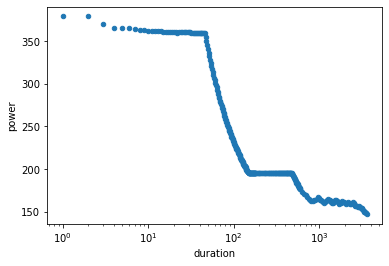

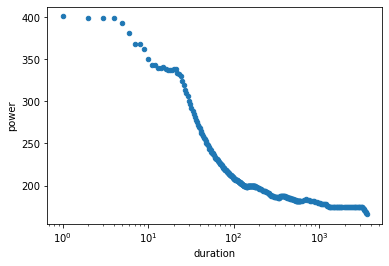

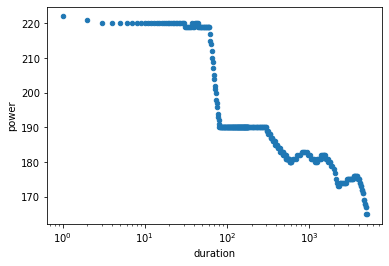

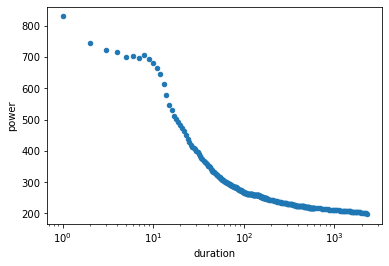

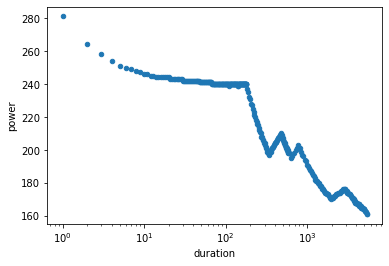

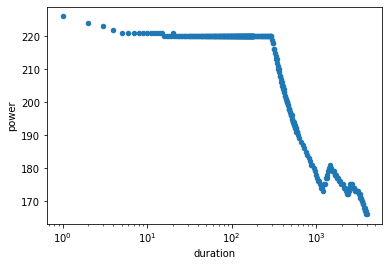

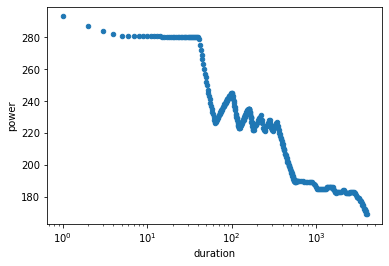

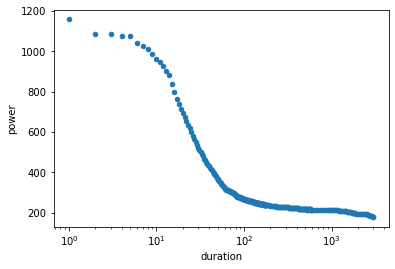

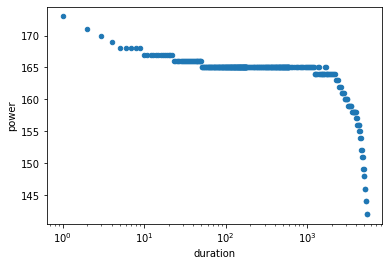

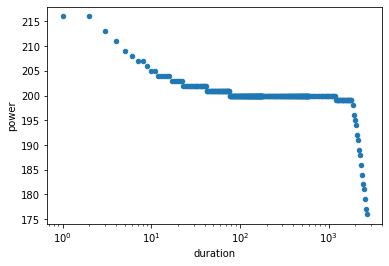

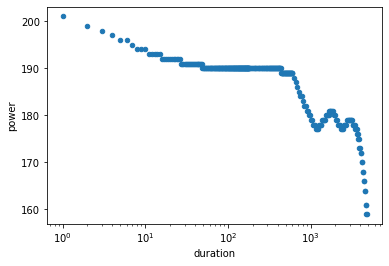

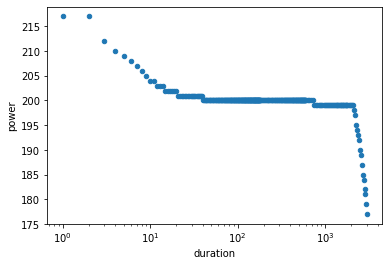

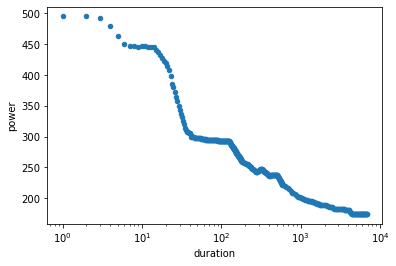

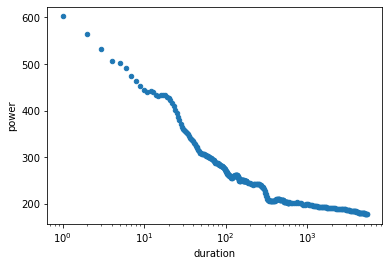

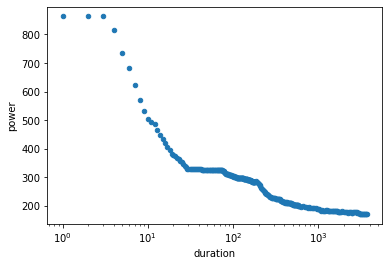

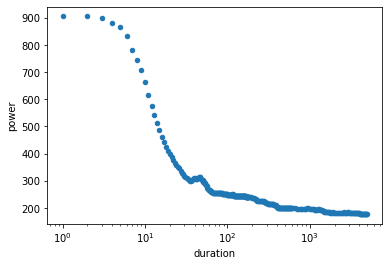

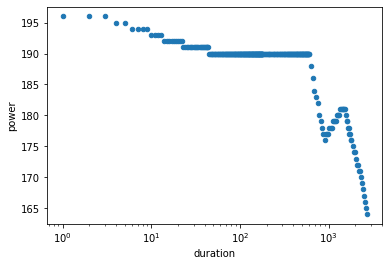

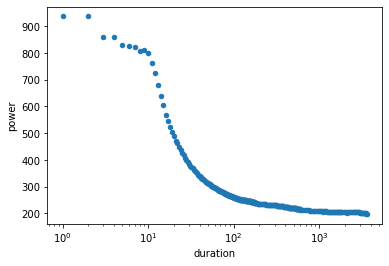

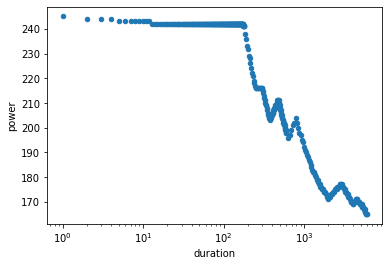

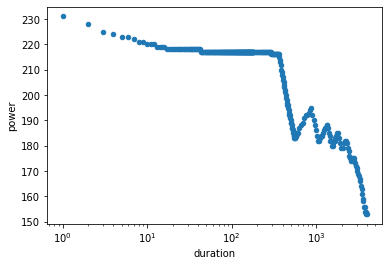

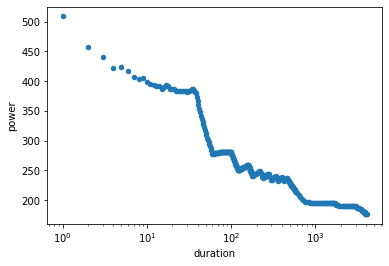

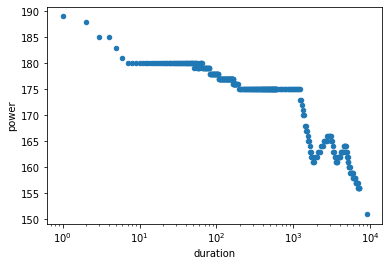

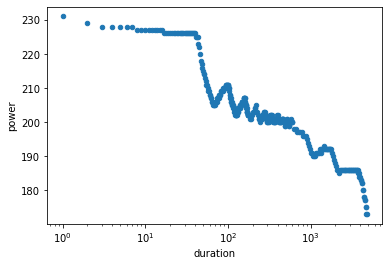

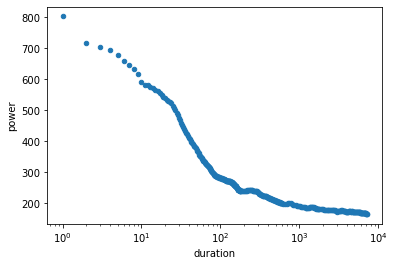

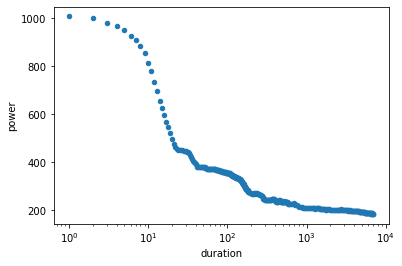

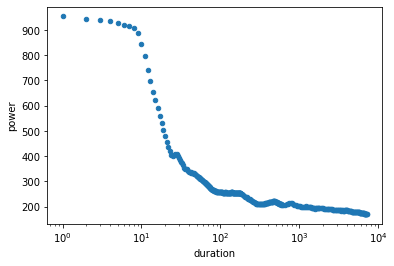

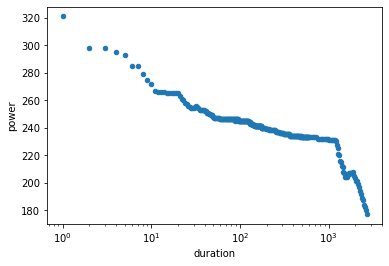

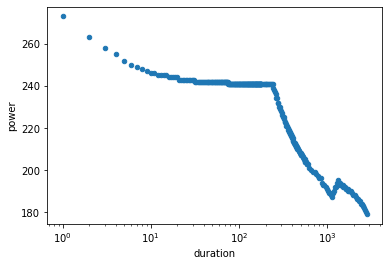

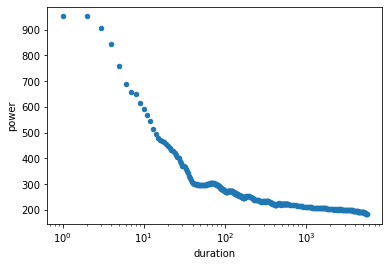

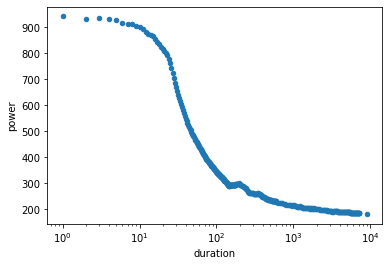

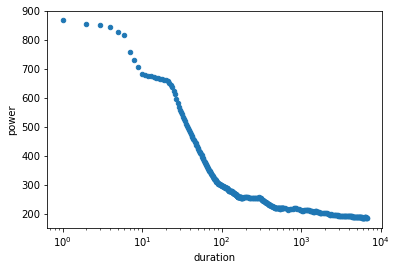

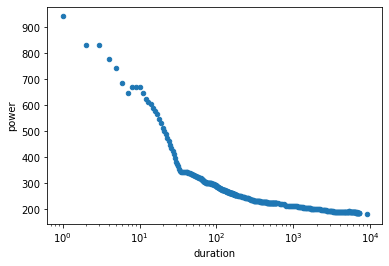

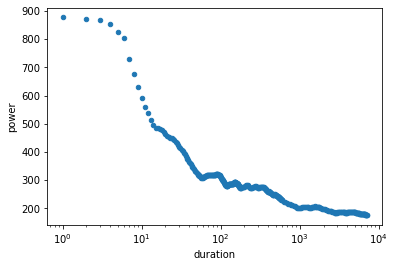

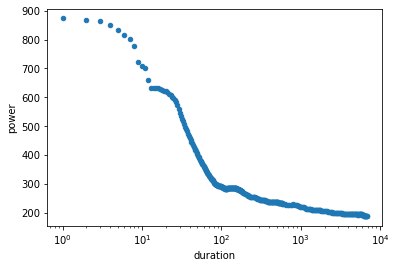

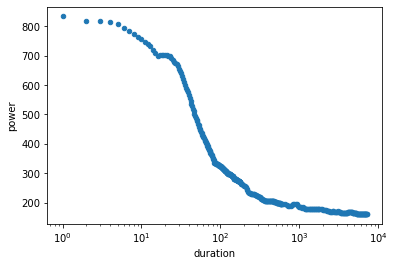

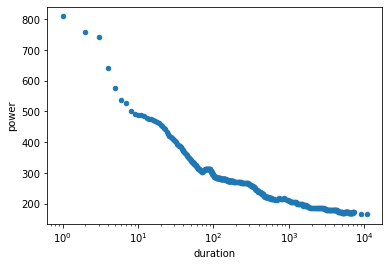

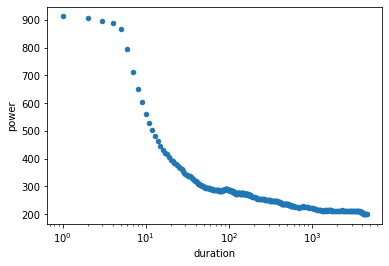

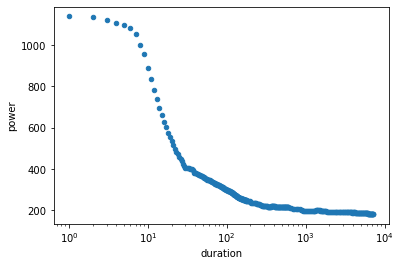

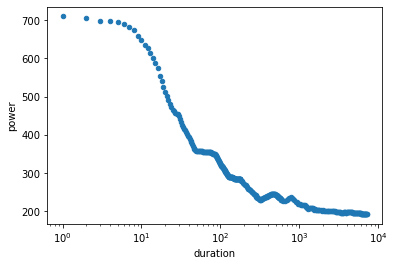

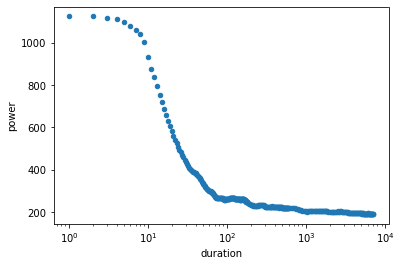

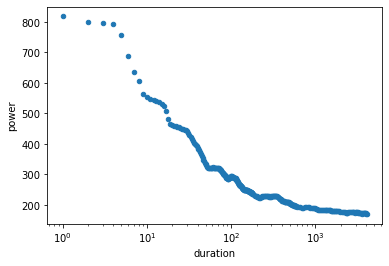

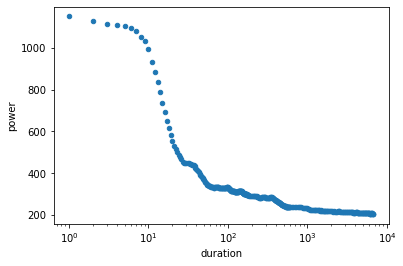

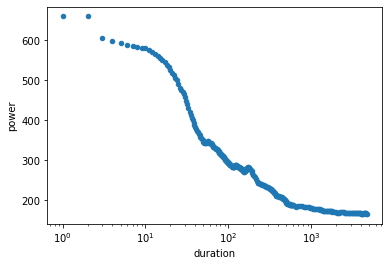

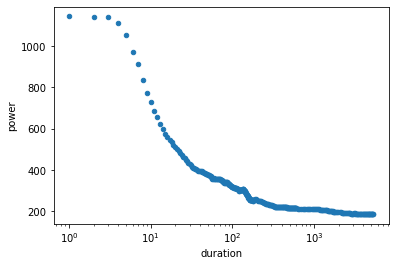

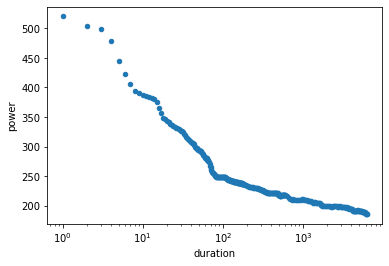

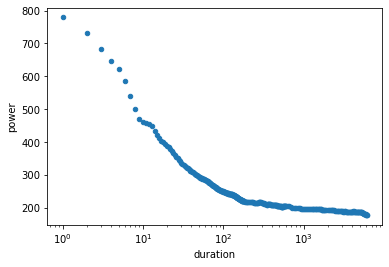

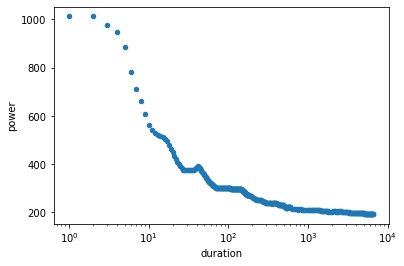

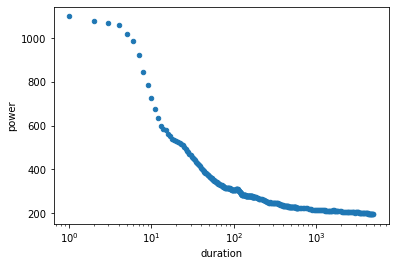

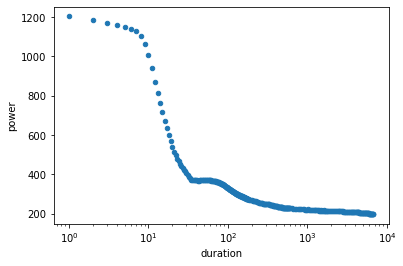

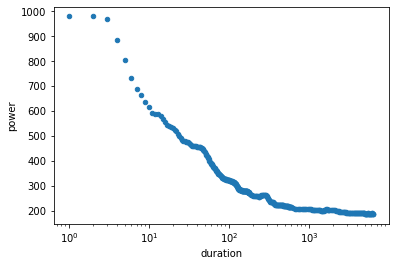

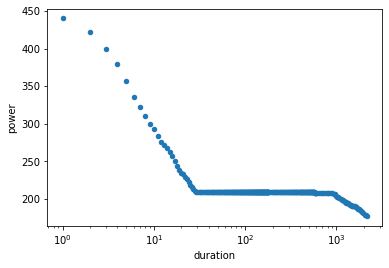

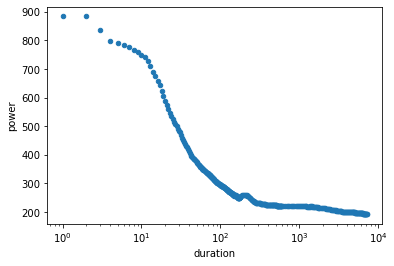

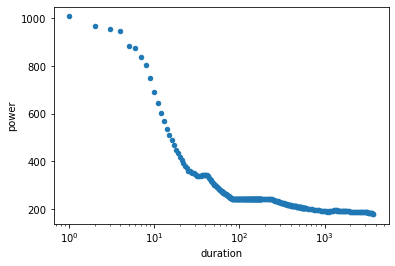

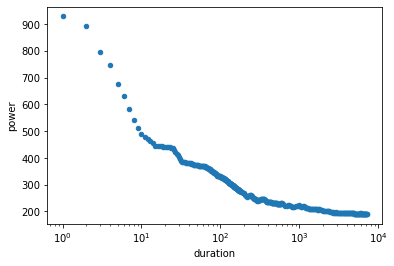

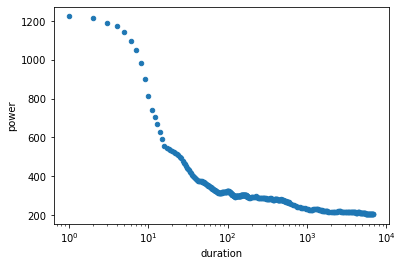

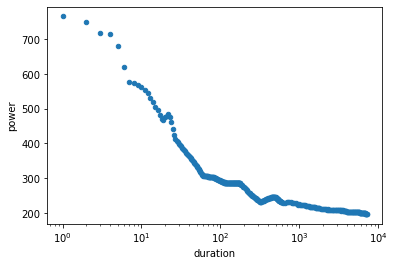

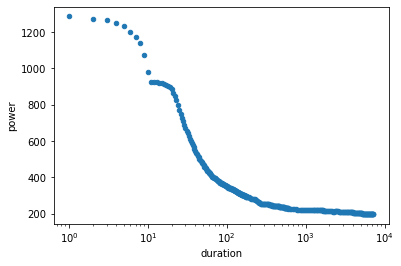

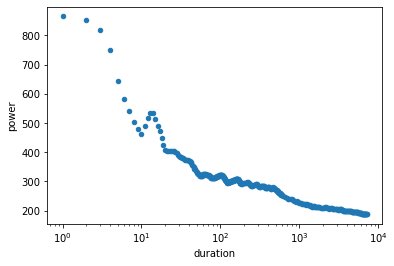

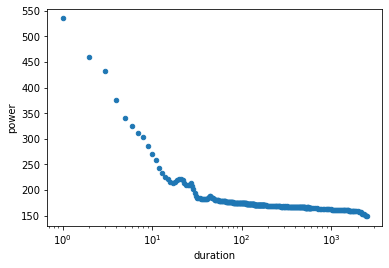

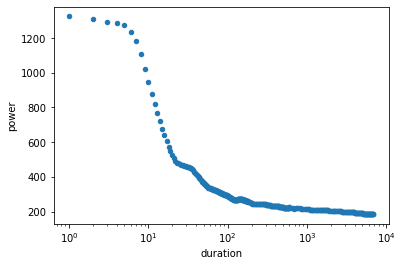

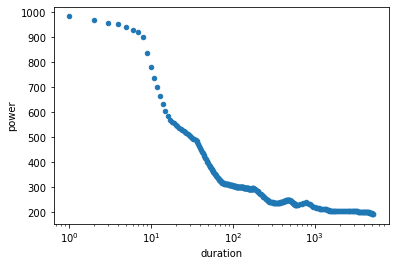

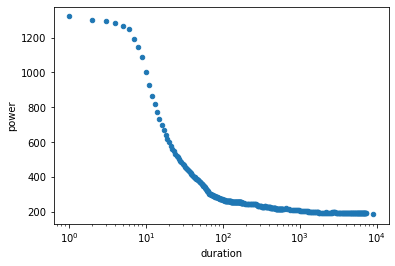

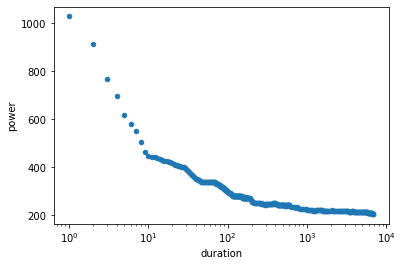

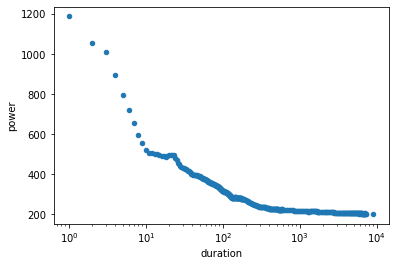

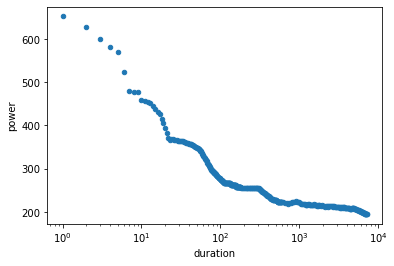

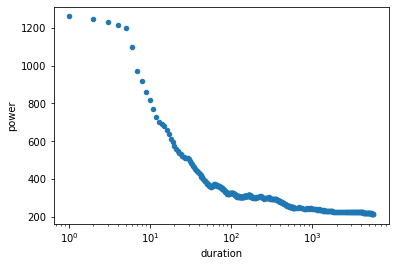

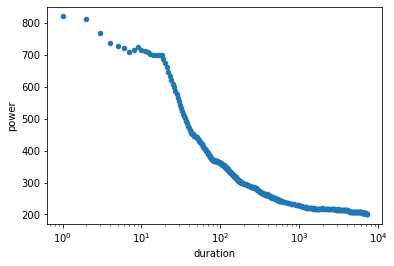

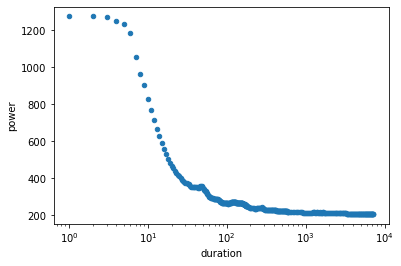

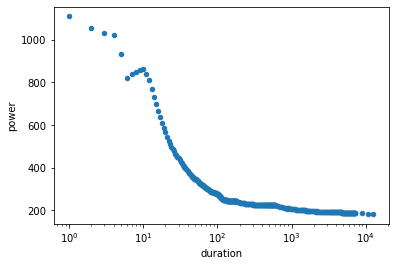

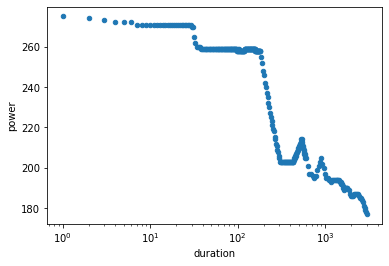

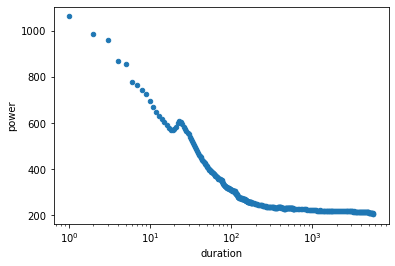

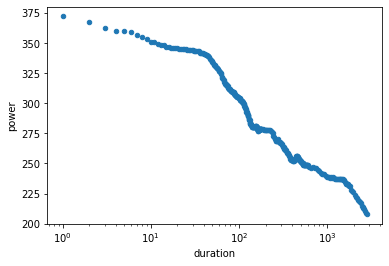

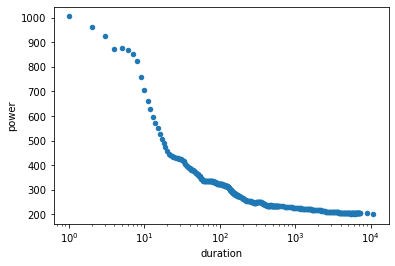

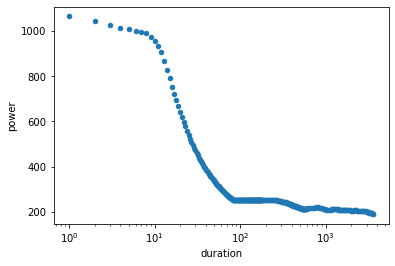

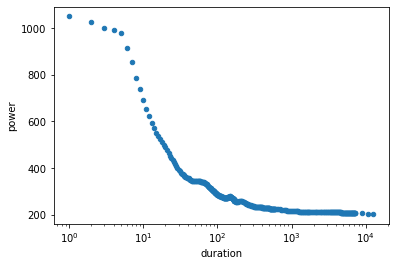

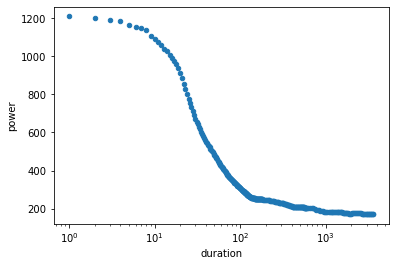

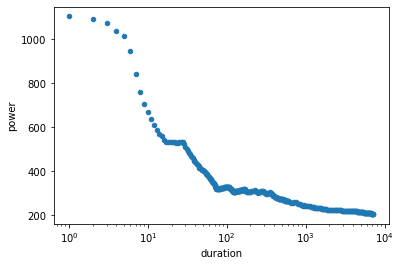

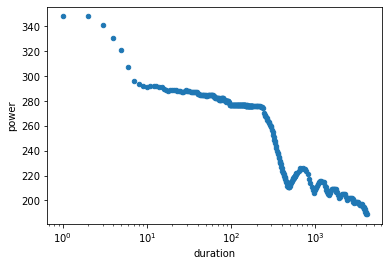

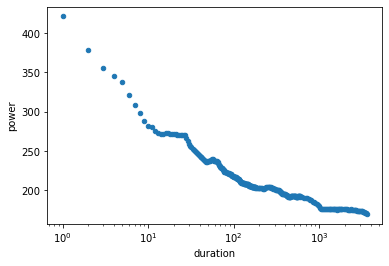

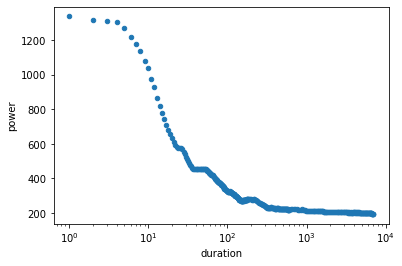

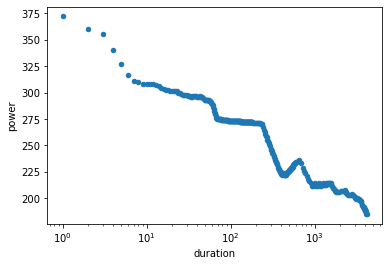

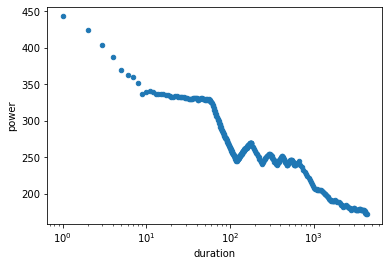

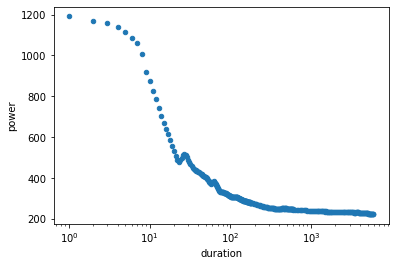

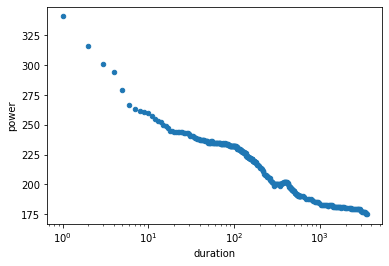

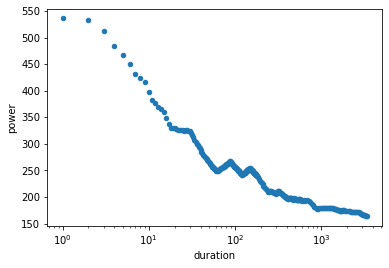

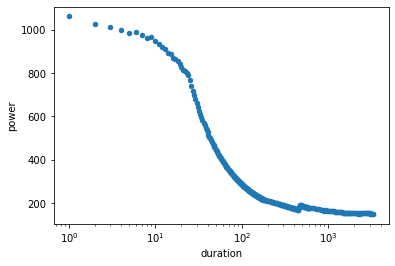

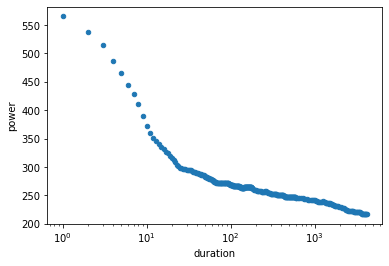

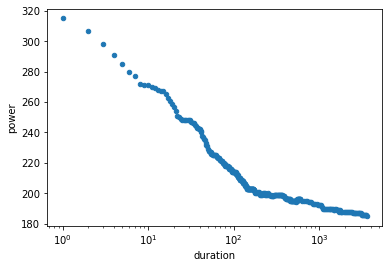

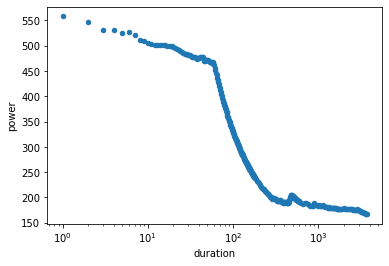

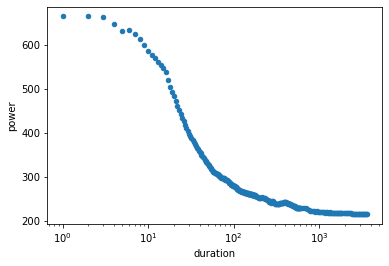

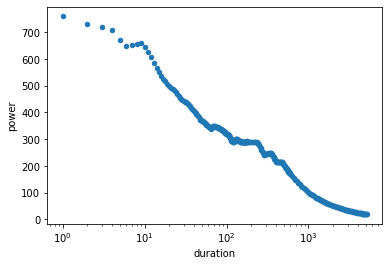

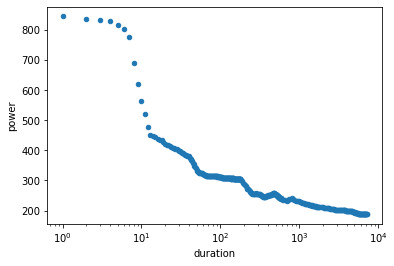

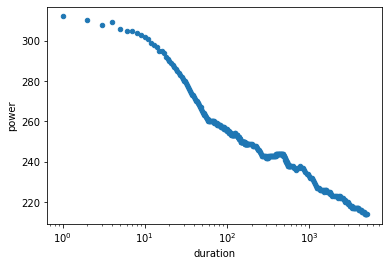

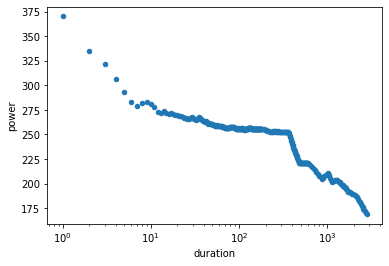

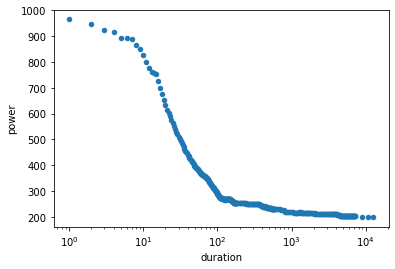

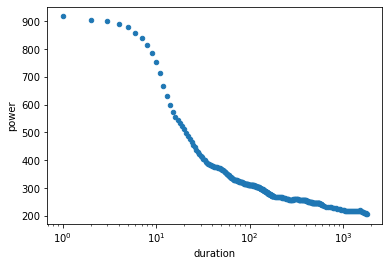

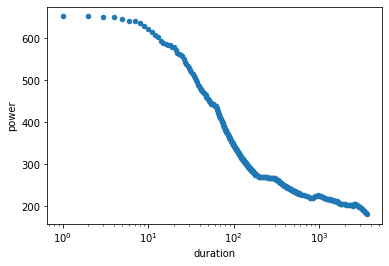

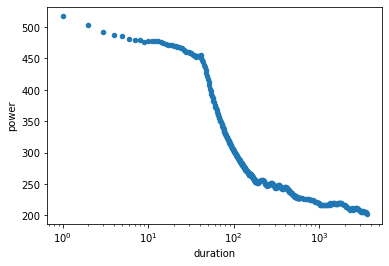

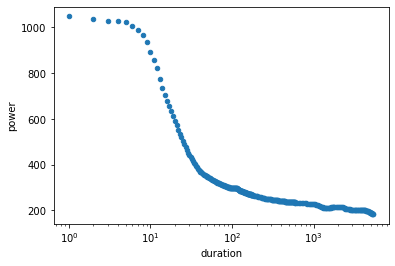

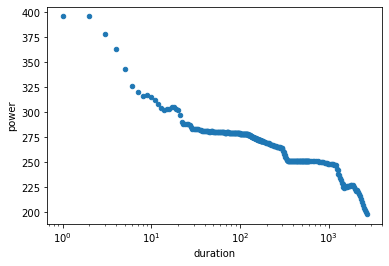

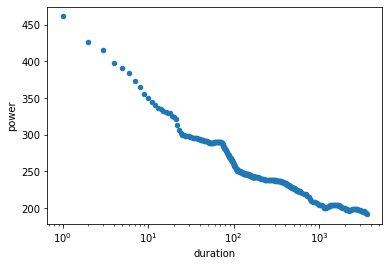

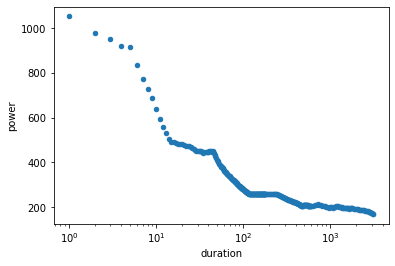

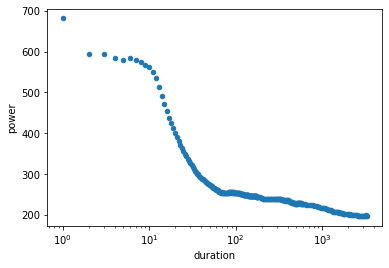

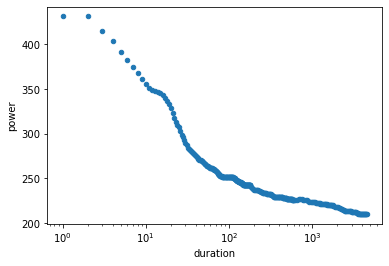

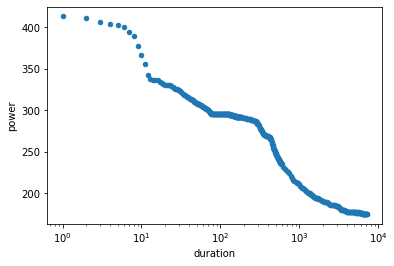

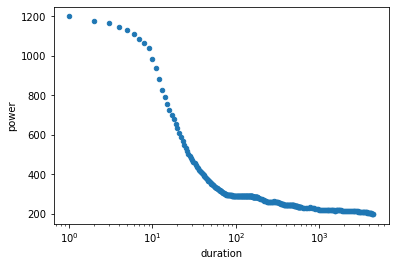

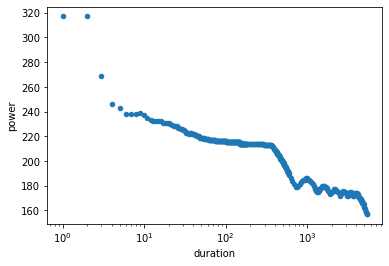

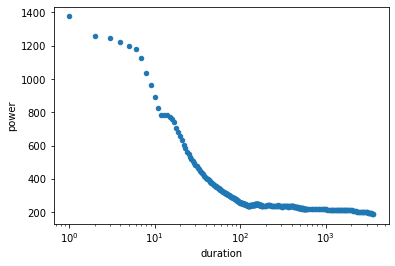

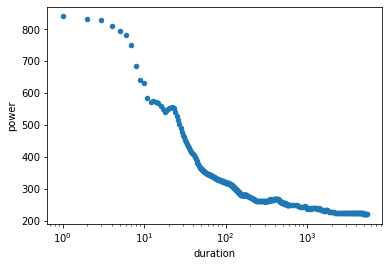

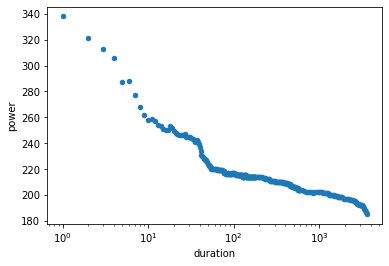

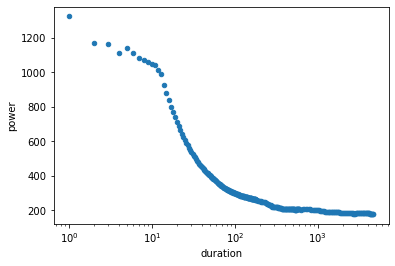

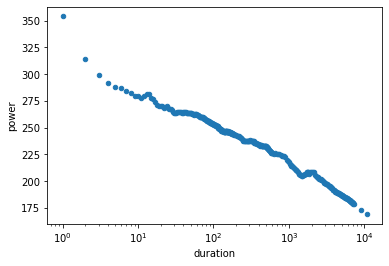

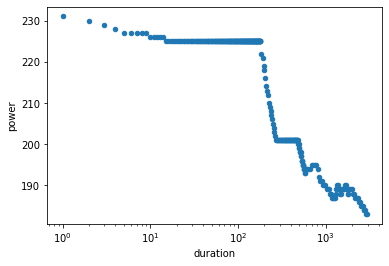

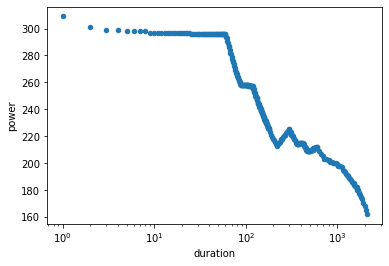

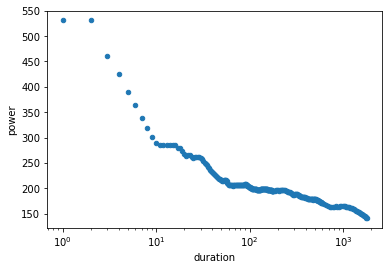

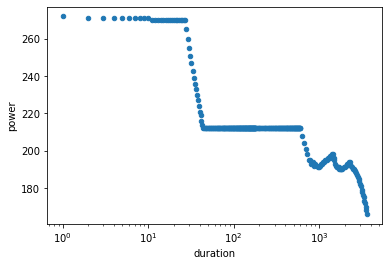

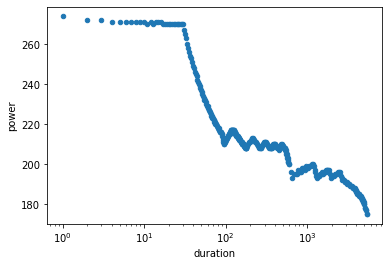

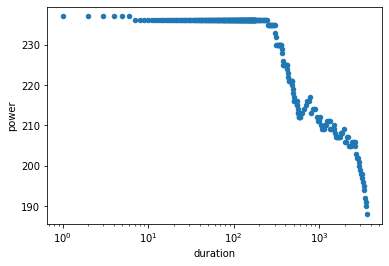

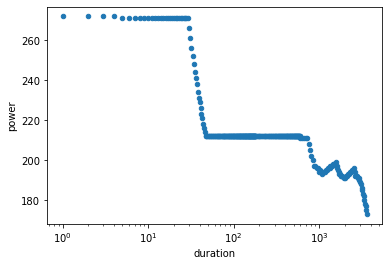

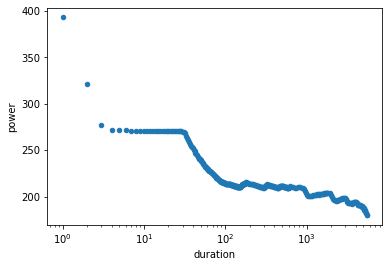

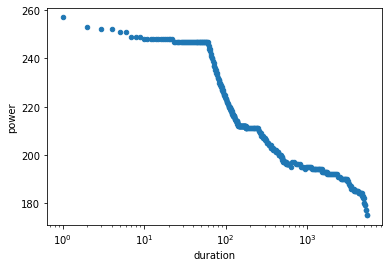

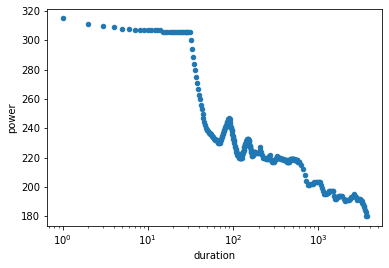

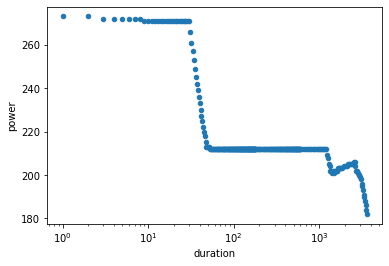

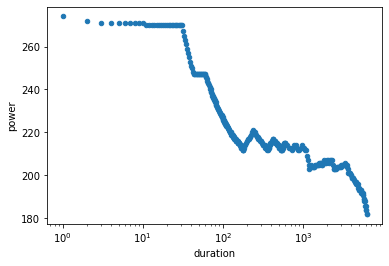

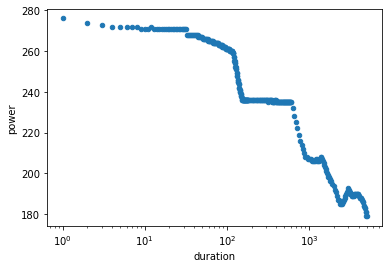

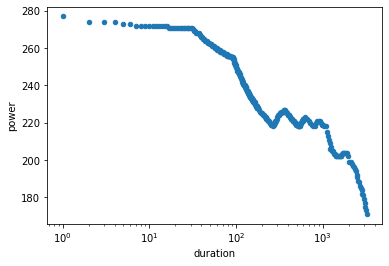

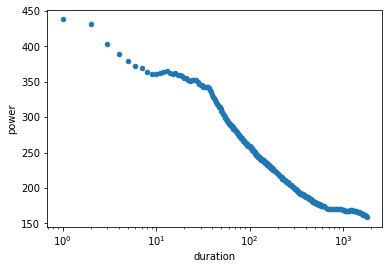

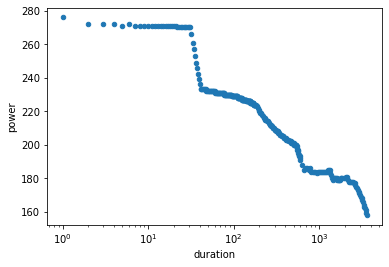

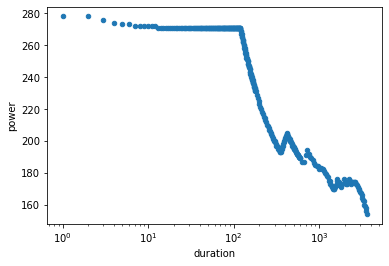

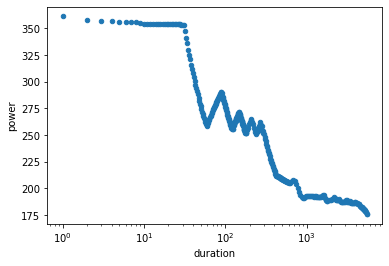

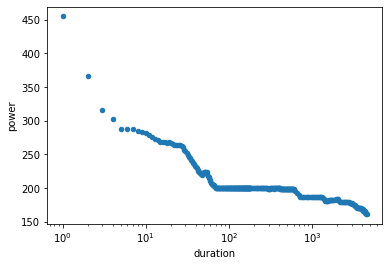

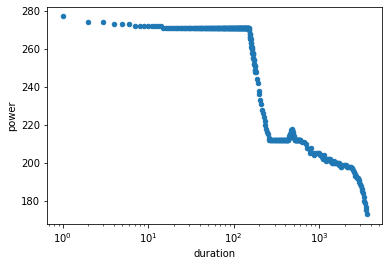

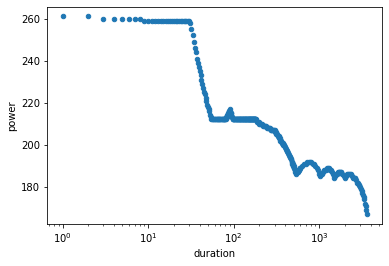

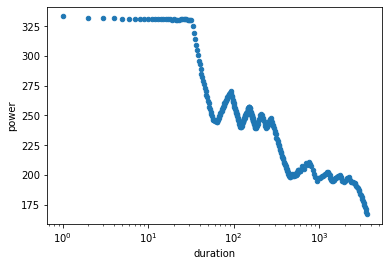

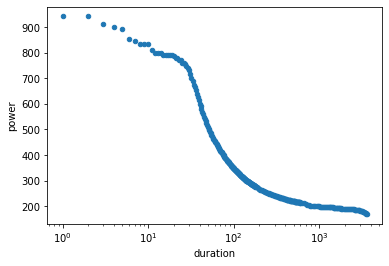

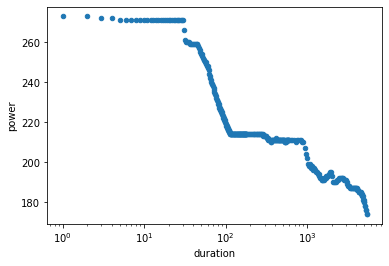

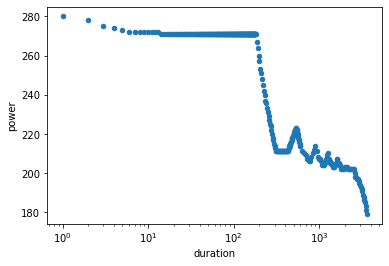

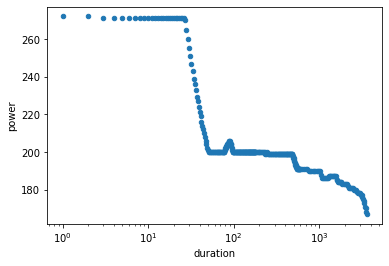

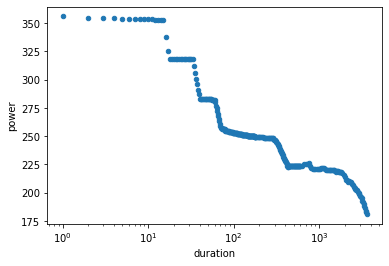

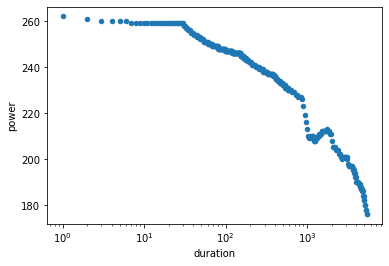

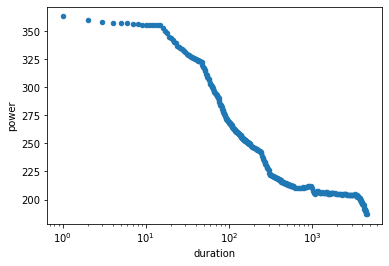

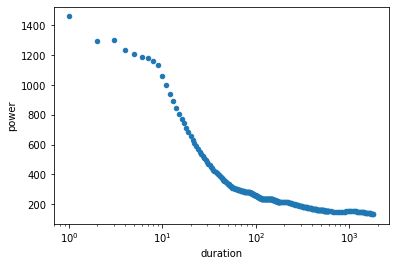

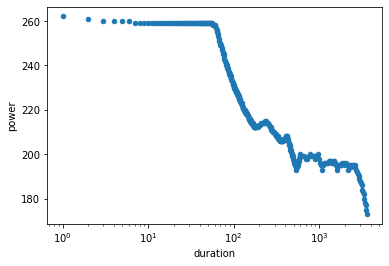

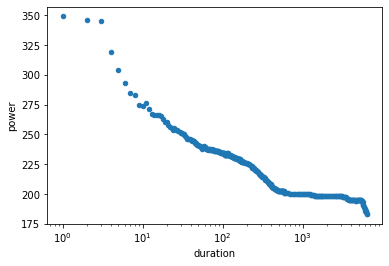

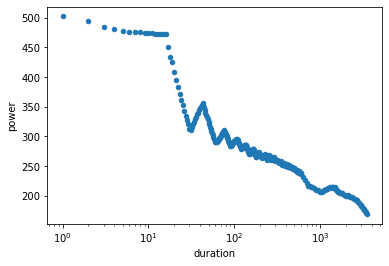

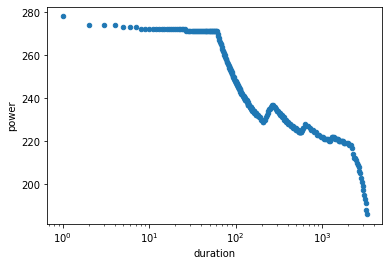

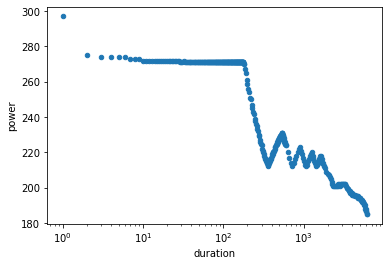

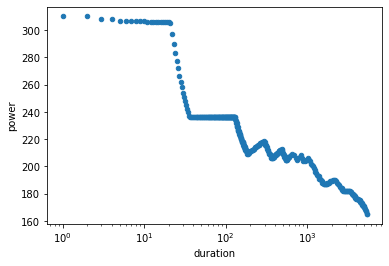

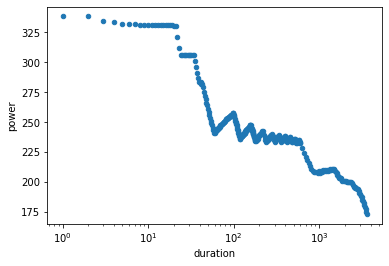

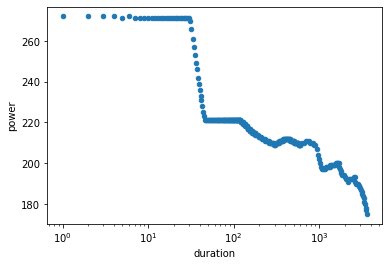

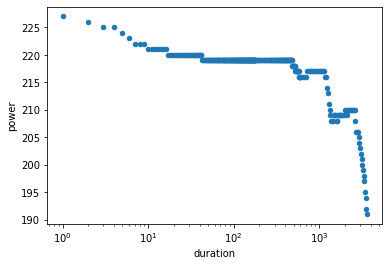

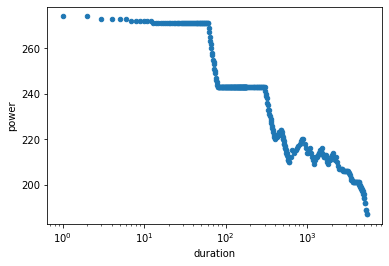

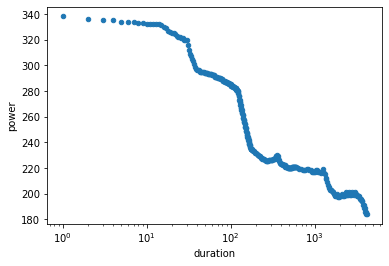

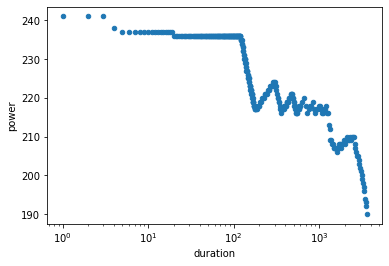

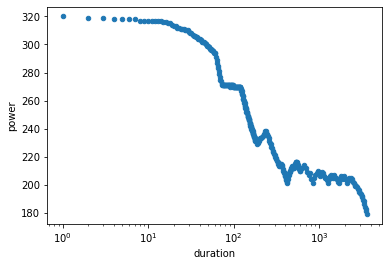

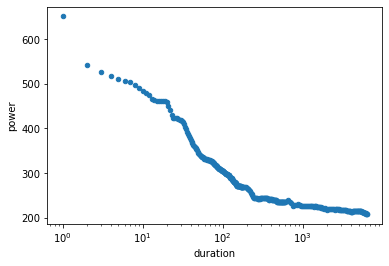

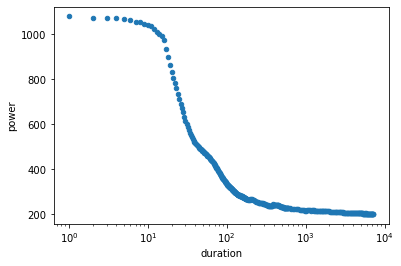

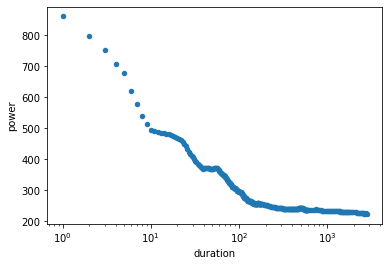

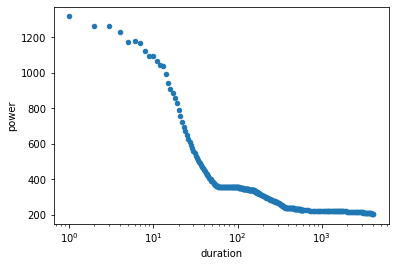

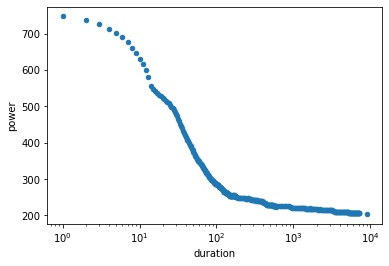

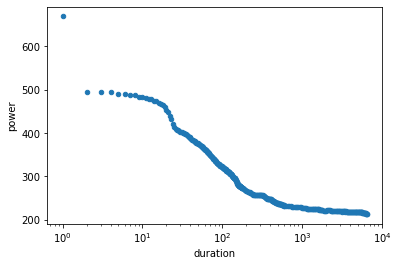

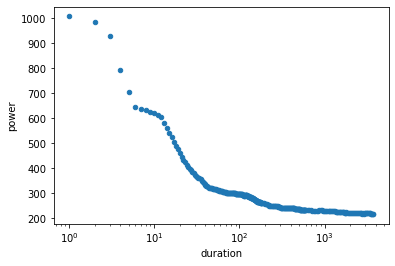

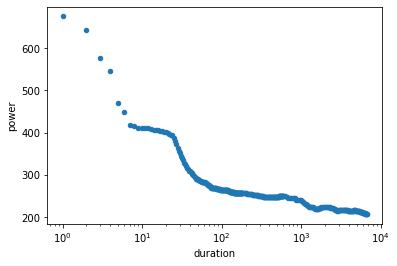

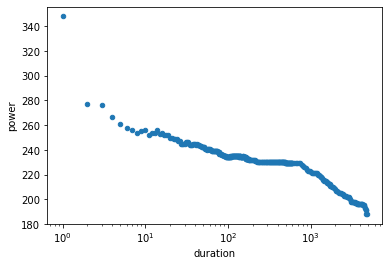

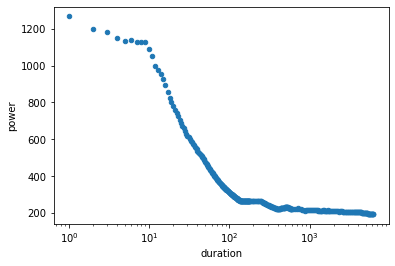

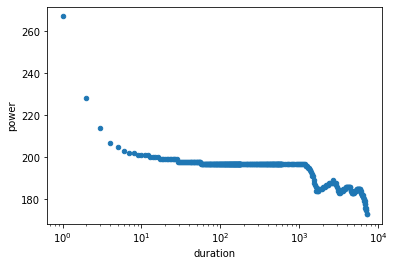

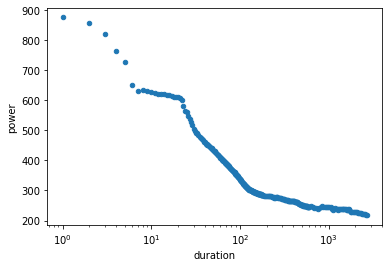

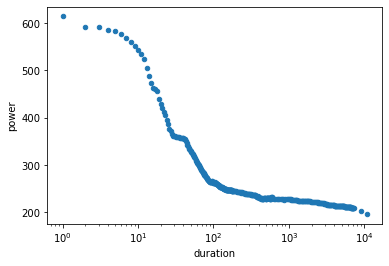

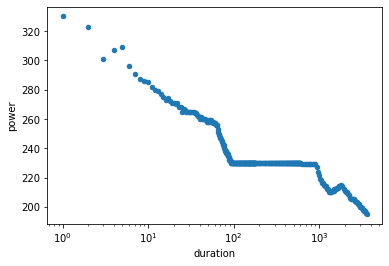

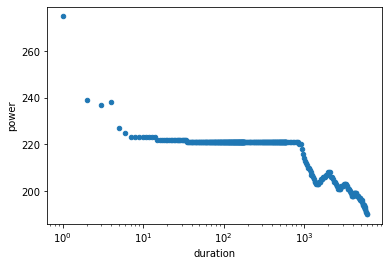

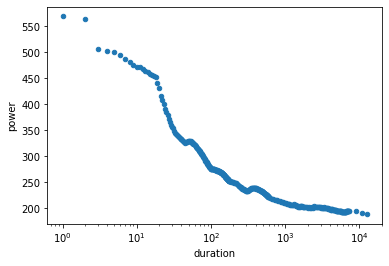

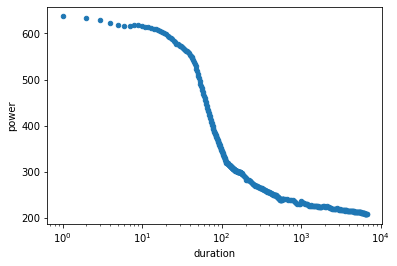

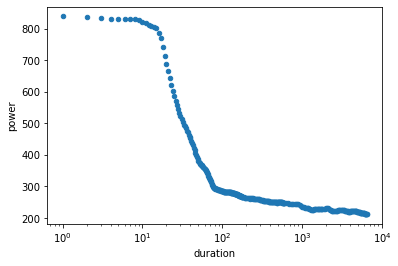

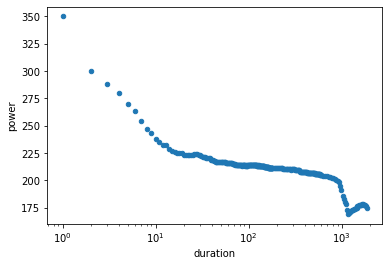

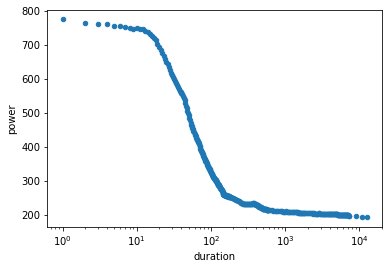

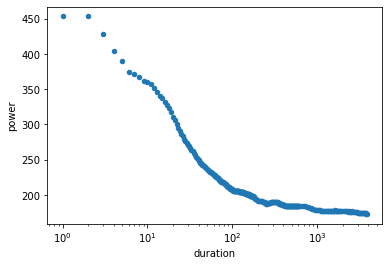

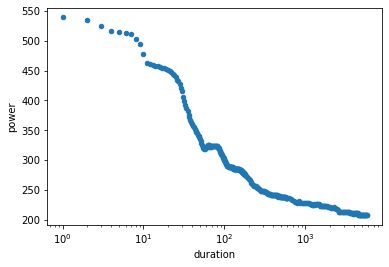

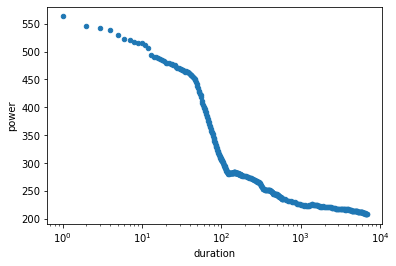

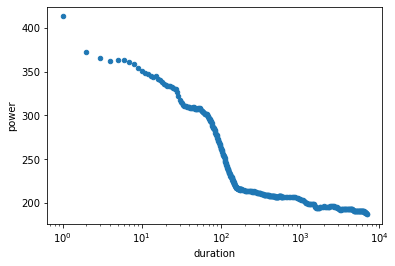

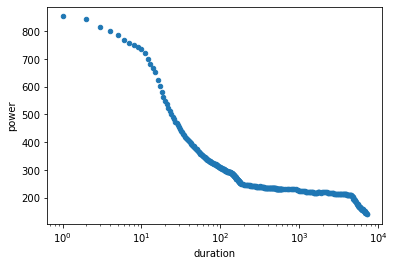

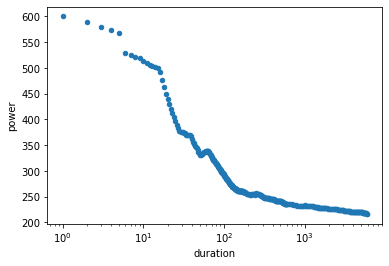

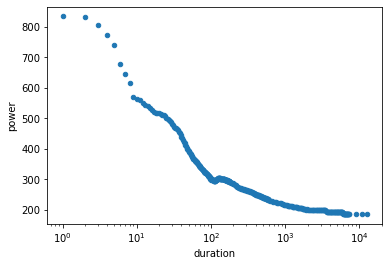

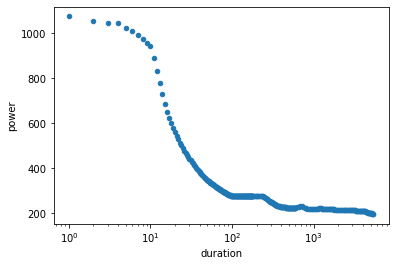

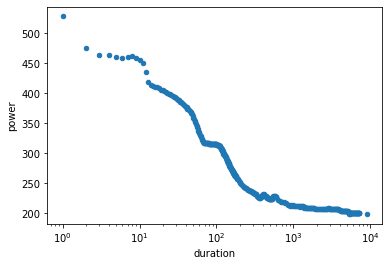

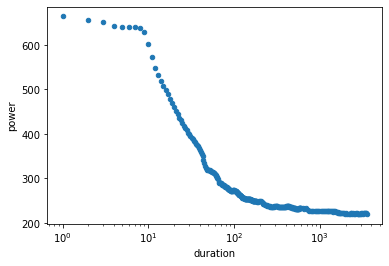

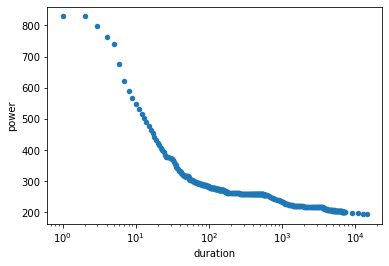

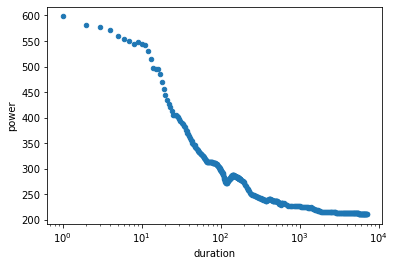

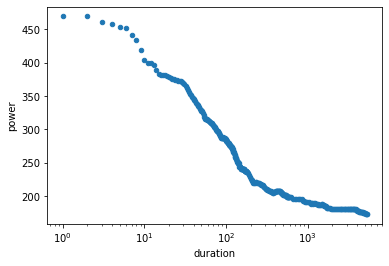

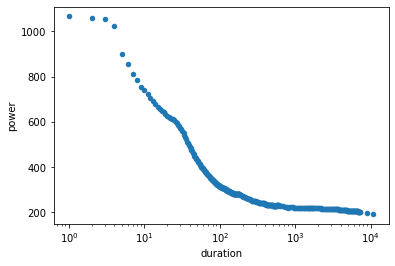

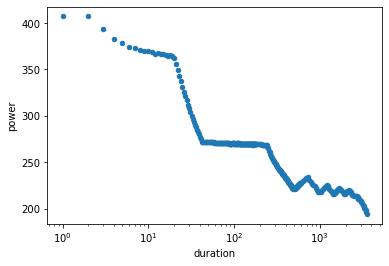

In [18]:
for activity in bike_activities:
    df = pd.DataFrame({'duration':activity.metadata['METRICS']['power_mmp_secs'], 'power':activity.metadata['METRICS']['power_mmp']})
    df.plot('duration', 'power', kind='scatter', logx=True)

# Create power curve based on all of activities for chosen athlete

In [19]:
power_curve = {}
#acc = []
for activity in bike_activities:
    for i in range(len(activity.metadata['METRICS']['power_mmp_secs'])):
        if activity.metadata['METRICS']['power_mmp_secs'][i] in power_curve:
            power_curve[activity.metadata['METRICS']['power_mmp_secs'][i]] = max(power_curve[activity.metadata['METRICS']['power_mmp_secs'][i]],activity.metadata['METRICS']['power_mmp'][i])
        else:
            power_curve[activity.metadata['METRICS']['power_mmp_secs'][i]] = activity.metadata['METRICS']['power_mmp'][i]

In [20]:
power_curve

{1: 1460,
 2: 1316,
 3: 1309,
 4: 1305,
 5: 1273,
 6: 1247,
 7: 1192,
 8: 1164,
 9: 1137,
 10: 1096,
 11: 1077,
 12: 1057,
 13: 1040,
 14: 1025,
 15: 1007,
 16: 990,
 17: 975,
 18: 959,
 19: 939,
 20: 912,
 21: 884,
 22: 856,
 23: 827,
 24: 801,
 25: 776,
 26: 758,
 27: 756,
 28: 747,
 29: 739,
 30: 731,
 31: 716,
 32: 701,
 33: 687,
 34: 674,
 35: 666,
 36: 652,
 37: 638,
 38: 625,
 39: 613,
 40: 601,
 41: 590,
 42: 579,
 43: 569,
 44: 559,
 45: 550,
 46: 541,
 47: 532,
 48: 524,
 49: 518,
 50: 512,
 51: 507,
 52: 503,
 53: 496,
 54: 491,
 55: 487,
 56: 482,
 57: 478,
 58: 474,
 59: 469,
 60: 465,
 61: 460,
 62: 456,
 63: 452,
 64: 448,
 65: 443,
 66: 439,
 67: 435,
 68: 431,
 69: 428,
 70: 424,
 71: 420,
 72: 416,
 73: 412,
 74: 409,
 75: 405,
 76: 402,
 77: 399,
 78: 395,
 79: 392,
 80: 389,
 81: 386,
 82: 384,
 83: 382,
 84: 380,
 85: 378,
 86: 375,
 87: 373,
 88: 371,
 89: 369,
 90: 367,
 91: 366,
 92: 365,
 93: 365,
 94: 365,
 95: 364,
 96: 364,
 97: 363,
 98: 362,
 99: 361,
 100

In [21]:
len(power_curve)

398

In [22]:
powerDF = pd.DataFrame.from_dict(power_curve, orient='index')

In [23]:
powerDF.reset_index()

,index,0
0,1,1460
1,2,1316
2,3,1309
3,4,1305
4,5,1273
...,...,...
393,7200,208
394,9000,205
395,10800,203
396,12600,202


<AxesSubplot:>

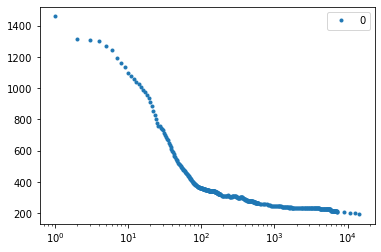

In [24]:
powerDF.plot(style='.',logx=True)

In [93]:
def month(df):
    return parse(df['date']).month

# Creating dataframe with interesting data of all activities for chosen athlete

In [26]:
def create_dataset(data):
    criticalPower = pd.DataFrame()
    titles = ['activity','athlete','date','weight','duration','coggan_tss','np']
    i = 0
    for activity in data:
        rows = criticalPower
        s2 = pd.Series(activity.metadata['METRICS']['power_mmp'], index=activity.metadata['METRICS']['power_mmp_secs'])
        s1 = pd.Series([activity.id,athlete.id,activity.metadata['date'],activity.metadata['METRICS']['athlete_weight'],activity.metadata['METRICS']['time_riding'],activity.metadata['METRICS']['coggan_tss'],activity.metadata['METRICS']['coggan_np'][0]],index=titles)
        row = pd.concat([s1,s2])
        criticalPower = pd.concat([rows, row.to_frame().T], ignore_index=True)
        i = i + 1
        print(f'{i}/{len(data)}')
    criticalPower['month'] = criticalPower.apply(lambda row: month(row), axis=1)
    return criticalPower


In [27]:
PowerDF = create_dataset(bike_activities)
PowerDF

1/232
2/232
3/232
4/232
5/232
6/232
7/232
8/232
9/232
10/232
11/232
12/232
13/232
14/232
15/232
16/232
17/232
18/232
19/232
20/232
21/232
22/232
23/232
24/232
25/232
26/232
27/232
28/232
29/232
30/232
31/232
32/232
33/232
34/232
35/232
36/232
37/232
38/232
39/232
40/232
41/232
42/232
43/232
44/232
45/232
46/232
47/232
48/232
49/232
50/232
51/232
52/232
53/232
54/232
55/232
56/232
57/232
58/232
59/232
60/232
61/232
62/232
63/232
64/232
65/232
66/232
67/232
68/232
69/232
70/232
71/232
72/232
73/232
74/232
75/232
76/232
77/232
78/232
79/232
80/232
81/232
82/232
83/232
84/232
85/232
86/232
87/232
88/232
89/232
90/232
91/232
92/232
93/232
94/232
95/232
96/232
97/232
98/232
99/232
100/232
101/232
102/232
103/232
104/232
105/232
106/232
107/232
108/232
109/232
110/232
111/232
112/232
113/232
114/232
115/232
116/232
117/232
118/232
119/232
120/232
121/232
122/232
123/232
124/232
125/232
126/232
127/232
128/232
129/232
130/232
131/232
132/232
133/232
134/232
135/232
136/232
137/232
138/232
139/

,activity,athlete,date,weight,duration,coggan_tss,np,1,2,3,...,6960,7020,7080,7140,7200,9000,10800,12600,14400,month
0,2017_10_26_16_12_03.csv,11bf3ef3-c7b3-4d8d-be36-9021982b51f3,2017/10/26 14:12:03 UTC,80.00000,2704.00000,44.23449,179.77751,1037,1027,1026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,2017_10_27_16_19_00.csv,11bf3ef3-c7b3-4d8d-be36-9021982b51f3,2017/10/27 14:19:00 UTC,80.00000,3007.00000,20.35122,115.97795,331,331,255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2,2017_10_29_04_48_58.csv,11bf3ef3-c7b3-4d8d-be36-9021982b51f3,2017/10/29 03:48:58 UTC,80.00000,3485.00000,24.86239,119.05964,296,296,296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,2017_10_30_16_06_18.csv,11bf3ef3-c7b3-4d8d-be36-9021982b51f3,2017/10/30 15:06:18 UTC,80.00000,2993.00000,19.88812,114.19614,714,650,606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,2017_11_01_16_17_49.csv,11bf3ef3-c7b3-4d8d-be36-9021982b51f3,2017/11/01 15:17:49 UTC,80.00000,4018.00000,36.60061,133.82580,163,163,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2019_04_14_10_24_55.csv,11bf3ef3-c7b3-4d8d-be36-9021982b51f3,2019/04/14 08:24:55 UTC,80.00000,14714.00000,324.92949,209.50253,829,829,798,...,202,201,201,201,201,198,196,195,194,4
228,2019_04_17_15_27_48.csv,11bf3ef3-c7b3-4d8d-be36-9021982b51f3,2019/04/17 13:27:48 UTC,80.00000,7195.00000,184.79255,225.88901,598,582,578,...,211,211,211,NaN,NaN,NaN,NaN,NaN,NaN,4
229,2019_04_18_13_30_12.csv,11bf3ef3-c7b3-4d8d-be36-9021982b51f3,2019/04/18 11:30:12 UTC,80.00000,5392.00000,92.38299,184.56110,469,469,461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
230,2019_04_19_09_54_21.csv,11bf3ef3-c7b3-4d8d-be36-9021982b51f3,2019/04/19 07:54:21 UTC,80.00000,12383.00000,264.16591,205.94183,1066,1058,1054,...,203,203,203,203,203,197,192,NaN,NaN,4


# Creating dataframe with power data of all activities for all athletes

In [105]:
def create_dataframe(athletes):
    criticalPower = pd.DataFrame()
    titles = ['activity','athlete','date','weight','duration','coggan_tss','np']
    i = 0
    j = 0
    noa = 0
    for athlete in athletes:
        try:
            activities = list(athlete.activities())
        except:
            continue
        filtered_activities = list(filter(lambda activ: activ.metadata['sport'] == 'Bike', activities))
        if (len(filtered_activities) < 30):
            continue
        else:
            noa = noa + 1
            for activity in filtered_activities:
                if 'power_mmp_secs' in activity.metadata['METRICS'] and 'time_riding' in activity.metadata['METRICS'] and 'coggan_tss' in activity.metadata['METRICS']:
                    rows = criticalPower
                    s2 = pd.Series(activity.metadata['METRICS']['power_mmp'], index=activity.metadata['METRICS']['power_mmp_secs'])
                    s1 = pd.Series([activity.id,athlete.id,activity.metadata['date'],activity.metadata['METRICS']['athlete_weight'],activity.metadata['METRICS']['time_riding'],activity.metadata['METRICS']['coggan_tss'],activity.metadata['METRICS']['coggan_np'][0]],index=titles)
                    row = pd.concat([s1,s2])
                    criticalPower = pd.concat([rows, row.to_frame().T], ignore_index=True)
        i = i + 1
        print(f'athletes: {i}/{len(athletes)};   noa: {noa}')
    criticalPower['month'] = criticalPower.apply(lambda row: month(row), axis=1)
    return criticalPower

In [ ]:
PowerDF = create_dataframe(athletes)
PowerDF

athletes: 1/6613;   noa: 1
athletes: 2/6613;   noa: 2
athletes: 3/6613;   noa: 3
athletes: 4/6613;   noa: 4
athletes: 5/6613;   noa: 5
athletes: 6/6613;   noa: 6
athletes: 7/6613;   noa: 7
athletes: 8/6613;   noa: 8
athletes: 9/6613;   noa: 9
athletes: 10/6613;   noa: 10
athletes: 11/6613;   noa: 11
athletes: 12/6613;   noa: 12
athletes: 13/6613;   noa: 13
athletes: 14/6613;   noa: 14
athletes: 15/6613;   noa: 15
athletes: 16/6613;   noa: 16
athletes: 17/6613;   noa: 17
athletes: 18/6613;   noa: 18
athletes: 19/6613;   noa: 19
athletes: 20/6613;   noa: 20
athletes: 21/6613;   noa: 21
athletes: 22/6613;   noa: 22
athletes: 23/6613;   noa: 23
athletes: 24/6613;   noa: 24
athletes: 25/6613;   noa: 25
athletes: 26/6613;   noa: 26
athletes: 27/6613;   noa: 27
athletes: 28/6613;   noa: 28
athletes: 29/6613;   noa: 29
athletes: 30/6613;   noa: 30
athletes: 31/6613;   noa: 31
athletes: 32/6613;   noa: 32
athletes: 33/6613;   noa: 33
athletes: 34/6613;   noa: 34
athletes: 35/6613;   noa: 35
ath

# Function calculating ftp per month:

In [ ]:
def calc_ftp(dataFrame):
    x = 0
    mon = 0
    athlete = ''
    monftp = []
    ftp = []
    acc = []
    for i, row in dataFrame.iterrows():
        if ((i + 1) == len(dataFrame)):
            if (np.isnan(row[1200])):
                acc = acc + [0]
            else:
                acc = acc + [row[1200]]
            x = x + 1
            monftp = [max(acc) * 0.95] * x
            ftp = ftp + monftp
        elif (i == 0):
            athlete = row['athlete']
            mon = row['month']
            if (np.isnan(row[1200])):
                acc = acc + [0]
            else:
                acc = acc + [row[1200]]
            x = x + 1
        elif (mon == row['month'] and athlete == row['athlete']):
            if (np.isnan(row[1200])):
                acc = acc + [0]
            else:
                acc = acc + [row[1200]]
            x = x + 1
        else:
            monftp = [max(acc) * 0.95] * x
            ftp = ftp + monftp
            x = 1
            monftp = []
        #print('i: ', i,'ftp: ', row[1200], ', month: ', row['month'], ', x: ', x)
        mon = row['month']
        athlete = row['athlete']
    return ftp

In [ ]:
PowerDF['ftp'] = calc_ftp(PowerDF)
PowerDF

# Calculating power zones for every activity

Of course in one month power zones will not change

In [ ]:
def calc_power_zones(dataFrame):
    athlete = ''
    mon = 0
    onePZ = []
    onePZ_acc = 0
    twoPZ = []
    twoPZ_acc = 0
    threePZ = []
    threePZ_acc = 0
    fourPZ = []
    fourPZ_acc = 0
    fivePZ = []
    fivePZ_acc = 0
    sixPZ = []
    sixPZ_acc = 0
    for i, row in dataFrame.iterrows():
        
        if (i == 0):
            athlete = row['athlete']
            mon = row['month']
            onePZ_acc = 0.55 * row['ftp']
            twoPZ_acc = 0.75 * row['ftp']
            threePZ_acc = 0.9 * row['ftp']
            fourPZ_acc = 1.05 * row['ftp']
            fivePZ_acc = 1.2 * row['ftp']
            sixPZ_acc = 1.5 * row['ftp']
            
            onePZ = onePZ + [onePZ_acc]
            twoPZ = twoPZ + [twoPZ_acc]
            threePZ = threePZ + [threePZ_acc]
            fourPZ = fourPZ + [fourPZ_acc]
            fivePZ = fivePZ + [fivePZ_acc]
            sixPZ = sixPZ + [sixPZ_acc]
            
        elif (mon == row['month'] and athlete == row['athlete']):
            onePZ = onePZ + [onePZ_acc]
            twoPZ = twoPZ + [twoPZ_acc]
            threePZ = threePZ + [threePZ_acc]
            fourPZ = fourPZ + [fourPZ_acc]
            fivePZ = fivePZ + [fivePZ_acc]
            sixPZ = sixPZ + [sixPZ_acc]
            
        else:
            onePZ_acc = 0.55 * row['ftp']
            twoPZ_acc = 0.75 * row['ftp']
            threePZ_acc = 0.9 * row['ftp']
            fourPZ_acc = 1.05 * row['ftp']
            fivePZ_acc = 1.2 * row['ftp']
            sixPZ_acc = 1.5 * row['ftp']
            
            onePZ = onePZ + [onePZ_acc]
            twoPZ = twoPZ + [twoPZ_acc]
            threePZ = threePZ + [threePZ_acc]
            fourPZ = fourPZ + [fourPZ_acc]
            fivePZ = fivePZ + [fivePZ_acc]
            sixPZ = sixPZ + [sixPZ_acc]
            
        mon = row['month']
        athlete = row['athlete']
    return onePZ, twoPZ, threePZ, fourPZ, fivePZ, sixPZ

In [ ]:
PowerDF['1_power_zone'], PowerDF['2_power_zone'], PowerDF['3_power_zone'], PowerDF['4_power_zone'], PowerDF['5_power_zone'], PowerDF['6_power_zone'] = calc_power_zones(PowerDF)
PowerDF

# Calculating time spent in every power zones for every activity

In [ ]:
def time_in_zones(dataFrame):
    time_in_zone1 = []
    time_in_zone2 = []
    time_in_zone3 = []
    time_in_zone4 = []
    time_in_zone5 = []
    time_in_zone6 = []
    time_in_zone7 = []
    z1 = 0
    z2 = 0
    z3 = 0
    z4 = 0
    z5 = 0
    z6 = 0
    time_z1 = 0
    time_z2 = 0
    time_z3 = 0
    time_z4 = 0
    time_z5 = 0
    time_z6 = 0
    time_z7 = 0
    athlete_id = ''
    for i, row in dataFrame.iterrows():
        print(f'{i}/{len(dataFrame)}')
        if (i == 0):
            z1 = row['1_power_zone']
            z2 = row['2_power_zone']
            z3 = row['3_power_zone']
            z4 = row['4_power_zone']
            z5 = row['5_power_zone']
            z6 = row['6_power_zone']
            athlete_id = row['athlete']
            athlete = od.get_remote_athlete(athlete_id)
        elif (z1 != row['1_power_zone']):
            z1 = row['1_power_zone']
            z2 = row['2_power_zone']
            z3 = row['3_power_zone']
            z4 = row['4_power_zone']
            z5 = row['5_power_zone']
            z6 = row['6_power_zone']
            if (athlete_id != row['athlete']):
                athlete_id = row['athlete']
                athlete = od.get_remote_athlete(athlete_id)
        activity = athlete.get_activity(row['activity'])
        for i, row in activity.data.iterrows():
            if (row['power'] <= z1 and row['power'] > 0):
                time_z1 = time_z1 + 1
            elif (row['power'] <= z2 and row['power'] > z1):
                time_z2 = time_z2 + 1
            elif (row['power'] <= z3 and row['power'] > z2):
                time_z3 = time_z3 + 1
            elif (row['power'] <= z4 and row['power'] > z3):
                time_z4 = time_z4 + 1
            elif (row['power'] <= z5 and row['power'] > z4):
                time_z5 = time_z5 + 1
            elif (row['power'] <= z6 and row['power'] > z5):
                time_z6 = time_z6 + 1
            elif (row['power'] > z6):
                time_z7 = time_z7 + 1
        time_in_zone1 = time_in_zone1 + [time_z1]
        time_in_zone2 = time_in_zone2 + [time_z2]
        time_in_zone3 = time_in_zone3 + [time_z3]
        time_in_zone4 = time_in_zone4 + [time_z4]
        time_in_zone5 = time_in_zone5 + [time_z5]
        time_in_zone6 = time_in_zone6 + [time_z6]
        time_in_zone7 = time_in_zone7 + [time_z7]
        time_z1 = 0
        time_z2 = 0
        time_z3 = 0
        time_z4 = 0
        time_z5 = 0
        time_z6 = 0
        time_z7 = 0
    return time_in_zone1, time_in_zone2, time_in_zone3, time_in_zone4, time_in_zone5, time_in_zone6, time_in_zone7

In [ ]:
PowerDF['time_in_zone1'], PowerDF['time_in_zone2'], PowerDF['time_in_zone3'], PowerDF['time_in_zone4'], PowerDF['time_in_zone5'], PowerDF['time_in_zone6'], PowerDF['time_in_zone7'] = time_in_zones(PowerDF)
PowerDF


In [ ]:
def calc_tss(dataFrame):
    tss = []
    for i, row in dataFrame.iterrows():
        tss = tss + [(float(row['duration'])*float(row['np'])*float(row['np'])/float(row['ftp']))/(float(row['ftp'])*3600)*100]
    return tss

In [ ]:
PowerDF['tss'] = calc_tss(PowerDF)
PowerDF